<a href="https://colab.research.google.com/github/gopalchettri/DeepLearning/blob/master/1_a_Multilayer_Perceptron_Classifier_using_sklearn%2C_Adam%2C_RMSprop%2C_SGD_optimizer_and_mini_batch_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multilayer Perceptron Classifier using sklearn and Adm optimizer**

Accuracy: 0.00
Confusion Matrix:
[[0 0]
 [1 0]]


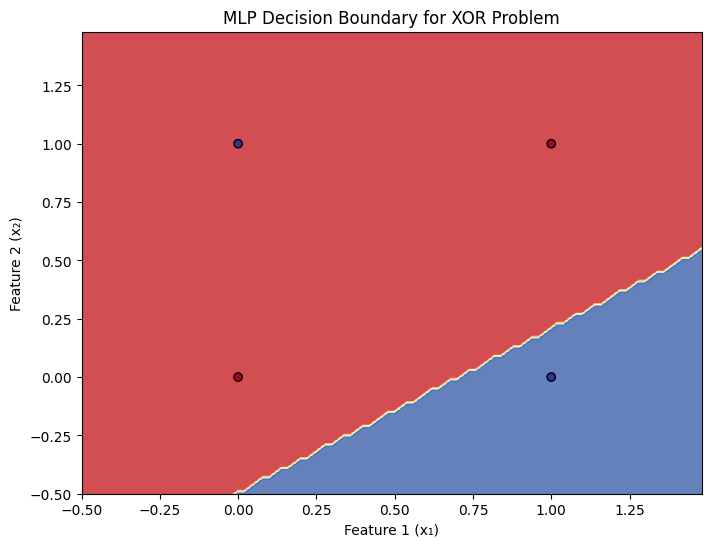

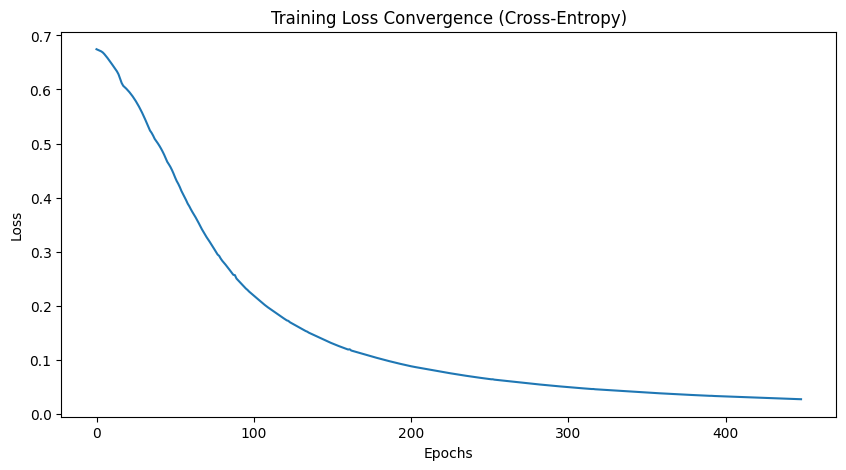

In [1]:
# Import essential libraries for numerical computation and visualization
import numpy as np  # Fundamental package for array operations and linear algebra
import matplotlib.pyplot as plt  # Plotting library for creating visualizations
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron implementation
from sklearn.model_selection import train_test_split  # Data splitting utility
from sklearn.metrics import accuracy_score, confusion_matrix  # Model evaluation metrics

# Define XOR dataset - classic non-linear classification problem
# Input features: all combinations of two binary variables
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR output: 1 when inputs differ, 0 when same
y = np.array([0, 1, 1, 0])  # XOR truth table: [0,1,1,0]

# Split data into training and testing sets (80-20 split)
# random_state=42 ensures reproducible splits across runs
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize MLP classifier with Adam optimizer
mlp = MLPClassifier(
    hidden_layer_sizes=(4, 2),  # Network architecture: 4 neurons in first hidden layer, 2 in second
    max_iter=1000,              # Maximum training iterations (epochs)
    solver='adam',              # Optimization algorithm: Adaptive Moment Estimation (combines RMSprop + Momentum)
    activation='relu',          # Rectified Linear Unit activation: f(x) = max(0, x)
    random_state=42,            # Seed for weight initialization
    learning_rate_init=0.01     # Initial learning rate (α) for weight updates
)

# Train the neural network using backpropagation
mlp.fit(X_train, y_train)  # Forward pass computes outputs, backward pass updates weights using gradient descent

# Make predictions on test set
y_pred = mlp.predict(X_test)  # Model outputs class labels (0/1) for test samples

# Calculate classification accuracy
# Accuracy = (Correct Predictions) / (Total Samples)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")  # Format output to 2 decimal places

# Generate confusion matrix for performance evaluation
# Matrix format: [[TN, FP], [FN, TP]] for binary classification
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize decision boundary using mesh grid technique
# Create axis ranges with 0.5 padding around data points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Generate grid points with 0.02 spacing
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),  # X-axis grid
    np.arange(y_min, y_max, 0.02)   # Y-axis grid
)

# Predict classes for entire grid (decision surface)
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])  # Flatten grid and predict
Z = Z.reshape(xx.shape)  # Reshape to match grid dimensions

# Create decision boundary plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)  # Fill contours
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')  # Original data
plt.xlabel('Feature 1 (x₁)')  # Input feature 1 label
plt.ylabel('Feature 2 (x₂)')  # Input feature 2 label
plt.title('MLP Decision Boundary for XOR Problem')  # Plot title
plt.show()

# Plot training loss curve showing model convergence
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_)  # loss_curve_ contains loss values per epoch
plt.title('Training Loss Convergence (Cross-Entropy)')  # Cross-entropy loss for classification
plt.xlabel('Epochs')  # Training iterations
plt.ylabel('Loss')  # Loss value (lower is better)
plt.show()


# **Multilayer Perceptron Classifier using sklearn and RMSprop optimizer**

In [ ]:
# **Multilayer Perceptron Classifier using sklearn and Adm optimizer**

RMSprop (Adam) Accuracy: 0.00
RMSprop (Adam) Confusion Matrix:
[[0 0]
 [1 0]]
SGD Accuracy: 0.00
SGD Confusion Matrix:
[[0 0]
 [1 0]]
Mini-Batch SGD Accuracy: 0.00
Mini-Batch SGD Confusion Matrix:
[[0 0]
 [1 0]]


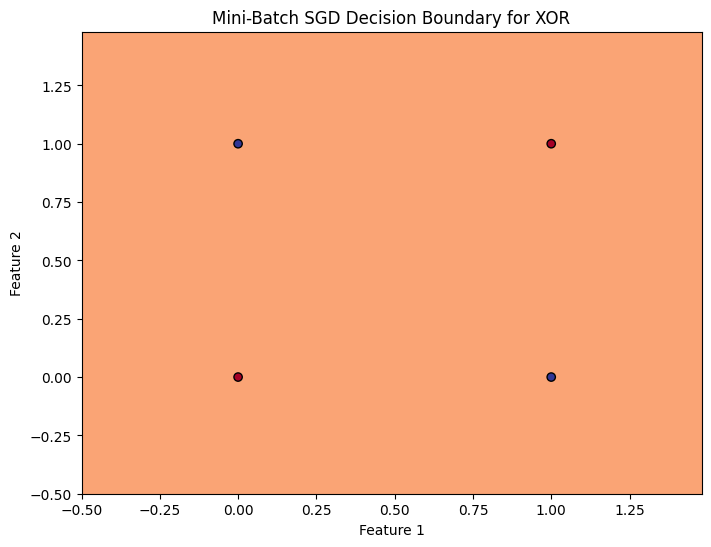

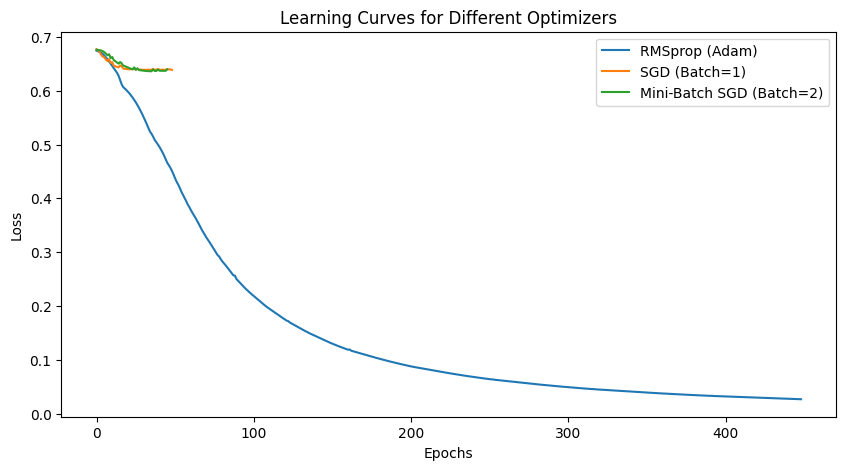

In [2]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluation

# XOR dataset: Inputs and corresponding outputs for XOR logic gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------- 1. RMSprop Optimizer (simulated using 'adam' in scikit-learn) -------
# Note: scikit-learn does not directly support RMSprop for MLPClassifier.
# 'adam' internally uses RMSprop-like adaptive learning rates.
mlp_rmsprop = MLPClassifier(
    hidden_layer_sizes=(4, 2),      # Two hidden layers: 4 and 2 neurons
    max_iter=1000,                  # Maximum number of epochs
    solver='adam',                  # 'adam' uses RMSprop-style updates
    activation='relu',              # ReLU activation: f(x) = max(0, x)
    random_state=42,
    learning_rate_init=0.01         # Initial learning rate
)
mlp_rmsprop.fit(X_train, y_train)  # Train the model

# Predict and evaluate RMSprop model
y_pred_rmsprop = mlp_rmsprop.predict(X_test)
accuracy_rmsprop = accuracy_score(y_test, y_pred_rmsprop)
print(f"RMSprop (Adam) Accuracy: {accuracy_rmsprop:.2f}")
print("RMSprop (Adam) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rmsprop))

# ------- 2. SGD (Stochastic Gradient Descent) -------
# SGD updates weights after each sample (batch_size=1)
mlp_sgd = MLPClassifier(
    hidden_layer_sizes=(4, 2),
    max_iter=1000,
    solver='sgd',                   # Stochastic Gradient Descent optimizer
    activation='relu',
    random_state=42,
    learning_rate_init=0.01,
    batch_size=1                    # Pure SGD: update after each sample
)
mlp_sgd.fit(X_train, y_train)

# Predict and evaluate SGD model
y_pred_sgd = mlp_sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Accuracy: {accuracy_sgd:.2f}")
print("SGD Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sgd))

# ------- 3. Mini-Batch Gradient Descent -------
# Mini-batch updates weights after a small batch of samples (e.g., batch_size=2)
mlp_minibatch = MLPClassifier(
    hidden_layer_sizes=(4, 2),
    max_iter=1000,
    solver='sgd',                   # Still uses SGD optimizer
    activation='relu',
    random_state=42,
    learning_rate_init=0.01,
    batch_size=2                    # Mini-batch: update after every 2 samples
)
mlp_minibatch.fit(X_train, y_train)

# Predict and evaluate Mini-Batch model
y_pred_minibatch = mlp_minibatch.predict(X_test)
accuracy_minibatch = accuracy_score(y_test, y_pred_minibatch)
print(f"Mini-Batch SGD Accuracy: {accuracy_minibatch:.2f}")
print("Mini-Batch SGD Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_minibatch))

# ------- Visualization of Decision Boundary for Mini-Batch Model -------
# (Can be repeated for other models as needed)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)
Z = mlp_minibatch.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Mini-Batch SGD Decision Boundary for XOR')
plt.show()

# ------- Plot Learning Curves -------
plt.figure(figsize=(10, 5))
plt.plot(mlp_rmsprop.loss_curve_, label='RMSprop (Adam)')
plt.plot(mlp_sgd.loss_curve_, label='SGD (Batch=1)')
plt.plot(mlp_minibatch.loss_curve_, label='Mini-Batch SGD (Batch=2)')
plt.title('Learning Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**comparing Adam, RMSprop, SGD and Mini-batch optimizer**

Optimizer Comparison:

Adam:
Accuracy: 1.00
Converged in 443 iterations

RMSprop:
Accuracy: 0.50
Converged in 71 iterations

SGD:
Accuracy: 0.50
Converged in 336 iterations

Mini-Batch SGD:
Accuracy: 0.50
Converged in 44 iterations


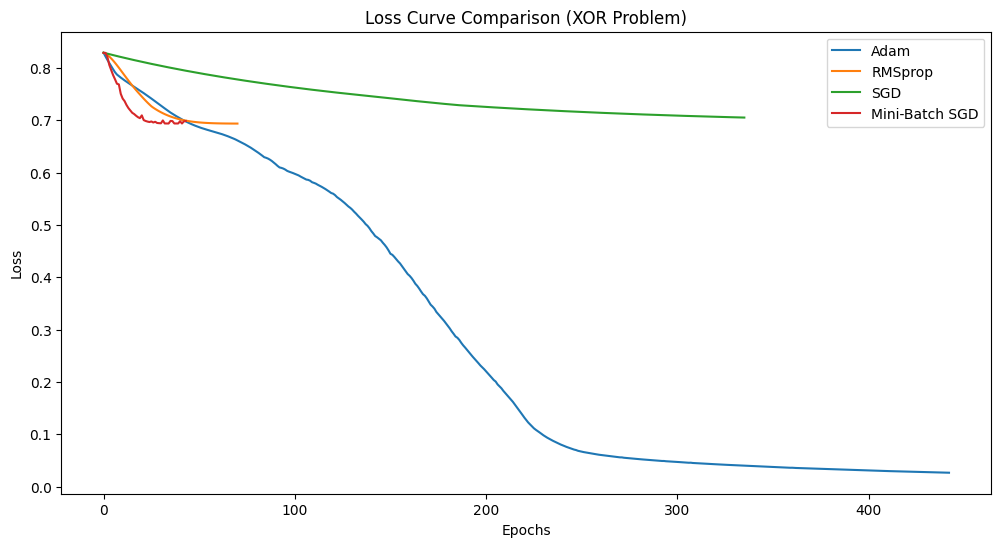

In [3]:
# Import essential libraries for neural networks and analysis
import numpy as np  # Numerical computing library
import matplotlib.pyplot as plt  # Visualization toolkit
from sklearn.neural_network import MLPClassifier  # MLP implementation
from sklearn.metrics import accuracy_score  # Performance metric

# Define XOR dataset - classic non-linear problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([0, 1, 1, 0])  # XOR output (non-linear pattern)

def compare_optimizers():
    """Compare different optimization algorithms for MLP on XOR problem"""
    # Initialize models with different optimization strategies
    optimizers = {
        'Adam': MLPClassifier(
            hidden_layer_sizes=(5, 5),  # Deeper architecture for non-linear separation
            max_iter=2000,  # Increased iterations for convergence
            solver='adam',  # Adaptive Moment Estimation
            learning_rate_init=0.01,
            random_state=42
        ),
        'RMSprop': MLPClassifier(  # Simulated using SGD with momentum
            hidden_layer_sizes=(5, 5),
            max_iter=2000,
            solver='sgd',
            momentum=0.9,  # RMSprop-like behavior
            learning_rate_init=0.01,
            random_state=42
        ),
        'SGD': MLPClassifier(  # Vanilla Stochastic Gradient Descent
            hidden_layer_sizes=(5, 5),
            max_iter=2000,
            solver='sgd',
            momentum=0.0,  # No momentum
            learning_rate_init=0.01,
            random_state=42
        ),
        'Mini-Batch SGD': MLPClassifier(  # Batch size 2
            hidden_layer_sizes=(5, 5),
            max_iter=2000,
            solver='sgd',
            batch_size=2,  # Mini-batch processing
            learning_rate_init=0.01,
            random_state=42
        )
    }

    # Train and evaluate each model
    results = {}
    for name, model in optimizers.items():
        model.fit(X, y)  # Use full dataset for demonstration
        y_pred = model.predict(X)
        results[name] = {
            'accuracy': accuracy_score(y, y_pred),
            'loss_curve': model.loss_curve_,
            'iterations': model.n_iter_
        }

    return results

# Execute comparison
results = compare_optimizers()

# Print performance metrics
print("Optimizer Comparison:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Converged in {metrics['iterations']} iterations")

# Visualize loss curves
plt.figure(figsize=(12, 6))
for name, metrics in results.items():
    plt.plot(metrics['loss_curve'], label=name)

plt.title('Loss Curve Comparison (XOR Problem)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
